# Step 1: Data Visualization

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 22 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   project_id                    150 non-null    int64  
 1   planned_duration              150 non-null    int64  
 2   actual_duration               150 non-null    int64  
 3   start_date                    150 non-null    object 
 4   end_date                      150 non-null    object 
 5   scope_in                      150 non-null    int64  
 6   scope_out                     150 non-null    int64  
 7   wbs_count                     150 non-null    int64  
 8   milestone_count               150 non-null    int64  
 9   deliverables_count            150 non-null    int64  
 10  planned_budget                150 non-null    int64  
 11  actual_budget                 150 non-null    int64  
 12  risk_change_requests          150 non-null    int64  
 13  risk_

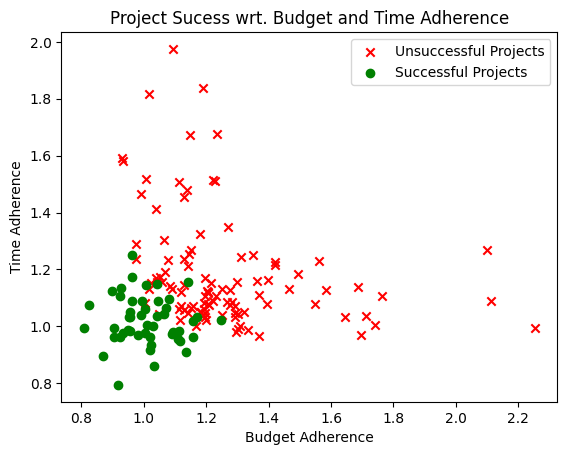

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Loading Dataset
project_data = pd.read_csv('project_dataset.csv')

# Project Information
print(project_data.info(), end='\n\n')
print(project_data.iloc[:10,:], end='\n\n')

# Visualizing Dataset
budget_adherence = project_data['actual_budget']/project_data['planned_budget']
time_adherence = project_data['actual_duration']/project_data['planned_duration']

plt.scatter(budget_adherence[project_data['success']==0],time_adherence[project_data['success']==0], label='Unsuccessful Projects', marker='x', color='red')
plt.scatter(budget_adherence[project_data['success']==1],time_adherence[project_data['success']==1], label='Successful Projects', marker='o', color='green')
plt.xlabel('Budget Adherence')
plt.ylabel('Time Adherence')
plt.title('Project Sucess wrt. Budget and Time Adherence')
plt.legend()
plt.show()



> **Description of Visualization**


The above figure shows that project success depends both on time and budget adherence i.e. the more the actual budget and actual time adhere to the planned budget and planned time respectively, the more chances of project success.

Now, with respect to the graph values in the above figure, budget adherence and time adherence would be close to 1 if planned budget and actual budget are close. When time and budget adherence gets greater than 1, the project failure chances increases.



# Step 2: Data Preprocessing


> Scaling Numerical Features



In [ ]:
import pandas as pd
from sklearn.preprocessing import StandardScaler

# Loading Features and Labels
X = project_data.drop(columns=['project_id','start_date','end_date','score','success'])
y = project_data['success']
print("Shape of Dataset\n", "\tShape (X): ", X.shape, "\n\tShape (y): ", y.shape, end='\n\n')

# Scaling Numerical Features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_scaled = pd.DataFrame(X_scaled, columns=X.columns)
print("Scaled Dataset: \n", X_scaled.head())

Shape of Dataset
 	Shape (X):  (150, 17) 
	Shape (y):  (150,)

Scaled Dataset: 
    planned_duration  actual_duration  scope_in  scope_out  wbs_count  \
0         -1.126028        -1.062300  1.104202   1.575808  -0.166686   
1         -0.027596         0.002122  1.010678  -1.302867  -1.757778   
2          1.019982         1.066544 -0.953317  -0.343309  -0.393985   
3         -1.258247        -1.390579  1.197726  -0.023456   0.969808   
4         -0.251351        -0.296314  0.075442   0.296397  -0.621283   

   milestone_count  deliverables_count  planned_budget  actual_budget  \
0         0.306696            1.534500       -1.445931      -1.379739   
1        -0.376538            0.911564       -0.759710      -0.474990   
2         0.306696           -0.334309       -1.095315      -1.025022   
3         0.989931           -0.334309       -1.784414      -1.632252   
4         0.534441            1.534500       -1.435815      -1.202300   

   risk_change_requests  risk_cost_forecast  ri

# Step 3: Model Training

In [ ]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
import numpy as np

# Splitting dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=True, random_state=10, stratify=y)

# Training Logistic Regressor
lgr = LogisticRegression(verbose=3)
print("Model Training...")
lgr.fit(X_train, y_train)
print("Model Trained Successfully", end='\n\n')

# Model Information
print("Classification Classes: ", lgr.classes_,end='\n\n')
print("Coefficients of Features: ", lgr.coef_)
print("Intercept: ", lgr.intercept_)

# Predicting on Training and Testing Sets
y_pred_train_lgr = lgr.predict(X_train)
y_pred_test_lgr = lgr.predict(X_test)

Model Training...
Model Trained Successfully

Classification Classes:  [0 1]

Coefficients of Features:  [[ 1.38160168e-01 -1.29520180e-01 -3.55610930e-04 -3.03408080e-02
  -1.68974428e-02 -1.10387397e-02 -1.37530429e-02  7.46358928e-06
  -9.22319214e-06 -7.38052800e-03  9.27777273e-08  1.03531957e-03
  -1.15093728e-04  7.46358928e-06  1.66867816e-05  1.65940040e-05
   8.57918855e-07]]
Intercept:  [-0.00088718]


# Step 4: Model Evaluation

Logistic Regression Results:

On Training Set: 
Accuracy:  0.925
Precision:  0.9142857142857143
Recall:  0.8421052631578947
F1 Score:  0.8767123287671234
Confusion Matrix:  [[79  3]
 [ 6 32]]



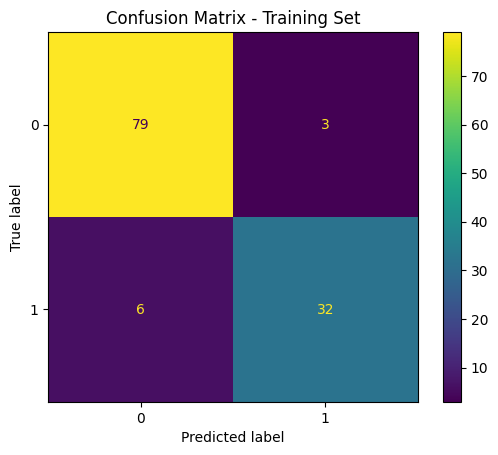



On Testing Set: 
Accuracy:  0.9
Precision:  0.8888888888888888
Recall:  0.8
F1 Score:  0.8421052631578948
Confusion Matrix:  [[19  1]
 [ 2  8]]



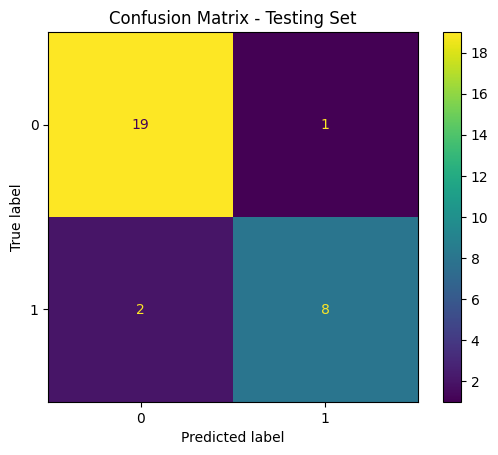

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, ConfusionMatrixDisplay

# Model Evaluation
print("Logistic Regression Results:", end = '\n\n')

# Training Results
print("On Training Set: ", end='\n')
print("Accuracy: ", accuracy_score(y_train, y_pred_train_lgr))
print("Precision: ", precision_score(y_train, y_pred_train_lgr))
print("Recall: ", recall_score(y_train, y_pred_train_lgr))
print("F1 Score: ", f1_score(y_train,y_pred_train_lgr))

cm_train = confusion_matrix(y_train, y_pred_train_lgr, labels=lgr.classes_)
print("Confusion Matrix: ", cm_train, end='\n\n')
cm_train_display = ConfusionMatrixDisplay(confusion_matrix=cm_train,
                              display_labels=lgr.classes_)
cm_train_display.plot()
plt.title('Confusion Matrix - Training Set')
plt.show()
print("\n")

# Testing Results
print("On Testing Set: ", end='\n')
print("Accuracy: ", accuracy_score(y_test, y_pred_test_lgr))
print("Precision: ", precision_score(y_test, y_pred_test_lgr))
print("Recall: ", recall_score(y_test, y_pred_test_lgr))
print("F1 Score: ", f1_score(y_test,y_pred_test_lgr))

cm_test = confusion_matrix(y_test, y_pred_test_lgr, labels=lgr.classes_)
print("Confusion Matrix: ", cm_test, end='\n\n')
cm_test_display = ConfusionMatrixDisplay(confusion_matrix=cm_test,
                              display_labels=lgr.classes_)

cm_test_display.plot()
plt.title("Confusion Matrix - Testing Set")
plt.show()
